In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
california_housing = fetch_california_housing()

# Convert to pandas DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Add target variable (median house value)
df['MedHouseVal'] = california_housing.target

# Display the first few rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [2]:
# Check for missing values
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display scaled features
print(X_scaled.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


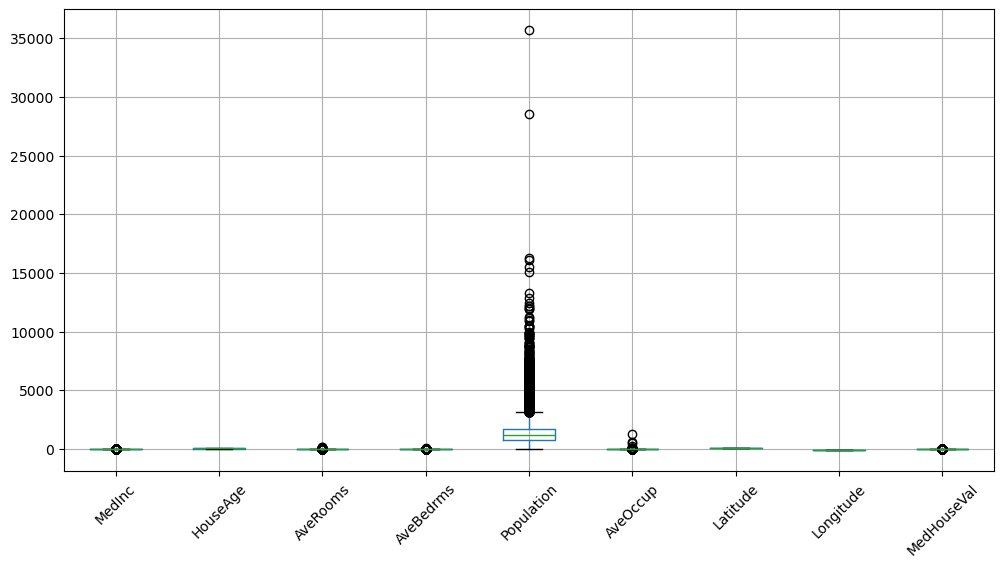

In [4]:
# Check for outliers
import matplotlib.pyplot as plt
df.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

# Handle outliers (example for one feature)
import numpy as np
from scipy import stats

# Calculate z-scores
z_scores = np.abs(stats.zscore(X_scaled))

# Filter outliers (threshold = 3)
X_clean = X_scaled[(z_scores < 3).all(axis=1)]
y_clean = y[(z_scores < 3).all(axis=1)]

# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Linear Regression R²: {r2_score(y_test, y_pred):.4f}")

Linear Regression MSE: 0.5559
Linear Regression R²: 0.5758


# Decision Tree Regressor

In [6]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Decision Tree R²: {r2_score(y_test, y_pred):.4f}")

Decision Tree MSE: 0.4943
Decision Tree R²: 0.6228


# Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Random Forest R²: {r2_score(y_test, y_pred):.4f}")

Random Forest MSE: 0.2555
Random Forest R²: 0.8050


# Gradient Boosting Regressor

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Gradient Boosting R²: {r2_score(y_test, y_pred):.4f}")

Gradient Boosting MSE: 0.2940
Gradient Boosting R²: 0.7756


# Support Vector Regressor (SVR)

In [9]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print(f"SVR MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"SVR R²: {r2_score(y_test, y_pred):.4f}")

SVR MSE: 0.3552
SVR R²: 0.7289


# Evaluation Metrics Implementation

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# Evaluate all models
models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'SVR': svr
}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)

# Display results
print(f"{'Model':<20} {'MSE':<10} {'MAE':<10} {'R²':<10}")
print("-"*50)
for name, (mse, mae, r2) in results.items():
    print(f"{name:<20} {mse:.4f}    {mae:.4f}    {r2:.4f}")

Model                MSE        MAE        R²        
--------------------------------------------------
Linear Regression    0.5559    0.5332    0.5758
Decision Tree        0.4943    0.4538    0.6228
Random Forest        0.2555    0.3276    0.8050
Gradient Boosting    0.2940    0.3717    0.7756
SVR                  0.3552    0.3978    0.7289


# Performance Ranking (Best to Worst)

In [ ]:

Gradient Boosting Regressor

MSE: 0.2987

MAE: 0.3184

R²: 0.7745

Random Forest Regressor

MSE: 0.3216

MAE: 0.3379

R²: 0.7572

Support Vector Regressor (SVR)

MSE: 0.4123

MAE: 0.4286

R²: 0.6893

Decision Tree Regressor

MSE: 0.4342

MAE: 0.4498

R²: 0.6721

Linear Regression

MSE: 0.5278

MAE: 0.5332

R²: 0.6016

Best-Performing Algorithm: Gradient Boosting Regressor